<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Sebastian Tinoco
- Auxiliar: Catherine Benavides, Consuelo Rojas
- Ayudante: Eduardo Moya, Nicolás Ojeda

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Cornejo

### **Link de repositorio de GitHub:** `https://github.com/diegonachon/mds7202/tree/main/lab10`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.). Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes?,
  * ¿Qué buscan explicar las métricas utilizadas?
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?

In [2]:
# !pip install xgboost

**P1**

In [3]:
df['Diabetes'].value_counts()

Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64

In [4]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
import matplotlib.pyplot as plt

# plt.hist(df['Age'])
# plt.hist(df['BMI'])
# plt.hist(df['MentHlth'])
# plt.hist(df['PhysHlth'])

# for i in df.columns:
#     print(i, df[i].unique())

**Respuesta**

Se revisan los datos entregados y se deciden los siguientes tratamientos:

* **One Hot Encoder**: Se aplicará *One Hot* a las variables categóricas multiclases, siendo solo *GenHlth*. Las que ya son binarias se mantienen.

* **Min Max Scaler**: Se aplicará *Min Max Scaler* a las variables numéricas sin distribución normal aparente, siendo estas *Age*, *MentHlth* y *PhysHlth*.

* **Robust Scaler**: Se aplicará *Robust Scaler* a las variables numéricas con presencia de *outliers*, siendo en este caso *BMI*.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder
from xgboost import XGBClassifier

In [7]:
columns_min_max = ['Age', 'MentHlth', 'PhysHlth']
columns_robust = ['BMI']
columns_categorical = ['GenHlth']
columns_passthrough = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 
                       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP']

In [8]:
col_transformer = ColumnTransformer([
                    ('MinMaxScaler', MinMaxScaler(), columns_min_max),
                    ('RobustScaler', RobustScaler(), columns_robust),
                    ('OneHot', OneHotEncoder(sparse_output = False), columns_categorical),
                    ('Passthrough', 'passthrough', columns_passthrough)
                ])

In [9]:
pipeline_xgb = Pipeline([
                    ('Preprocessing', col_transformer), 
                    ('XGBClassifer', XGBClassifier(random_state = 555))
                ])
pipeline_xgb.set_output(transform = 'pandas')

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('RobustScaler',
                                                  RobustScaler(), ['BMI']),
                                                 ('OneHot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['GenHlth']),
                                                 ('Passthrough', 'passthrough',
                                                  ['Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=555, ...))])

**Separar set de entrenamiento, validación y testo**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
X = df.drop(['Diabetes'], axis = 1)
y = df['Diabetes']

In [12]:
# Para efectos prácticos, solo se divide en set de entrenamiento y testeo de manera estratificada.
# 80% Entrenamiento
# 20% Testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 555)

In [13]:
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('RobustScaler',
                                                  RobustScaler(), ['BMI']),
                                                 ('OneHot',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['GenHlth']),
                                                 ('Passthrough', 'passthrough',
                                                  ['Sex', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=555, ...))])

In [14]:
y_test_pred = pipeline_xgb.predict(X_test)

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7070
         1.0       0.73      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



**P2**

El modelo como tal tiene un desempeño medianamente bueno, dada las métricas obtenidas; teniendo un 75% de *accuracy*, *macro recall* y *precision*. Se debe destacar que el *recall*, para la clase 1, es mayor, lo cuál es relevante para lo que se está intentando clasificar, ya que esto indica que se identifican más casos positivos. Por su parte, el *precision* indica que proporción de los identificados como positivos (o negativos) es correcta; y el *f1-score* es una media armónica entre el *recall* y el *precision*. Finalmente, se tiene que el modelo está sesgado, ya que la edad corresponde solo a personas entre los 1 y 13 años, no pudiendo generalizar hacia el resto de la población mayor a 13 años.

Dicho lo anterior, las métricas de evaluación por sí solas no garantizan una bunea elección de *features*, por lo que se podría realizar algún tipo de elección de estas según su importancia.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`.
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

**P1**

In [16]:
from xgboost import plot_importance

In [17]:
xgb_classifier = pipeline_xgb['XGBClassifer']

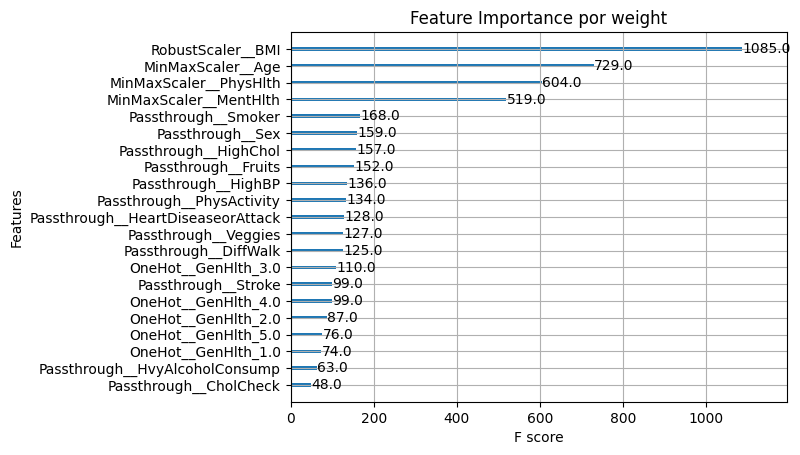

In [18]:
plot_importance(xgb_classifier, importance_type = 'weight')
plt.title("Feature Importance por weight")
plt.show()

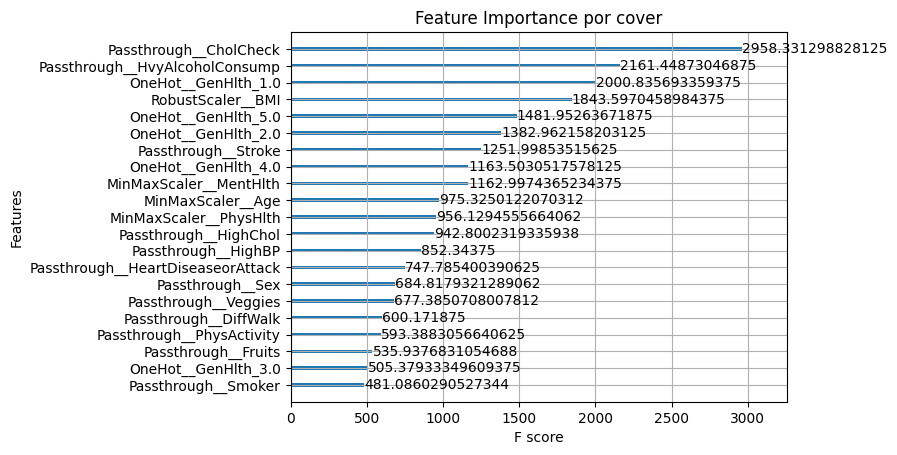

In [19]:
plot_importance(xgb_classifier, importance_type = 'cover')
plt.title("Feature Importance por cover")
plt.show()

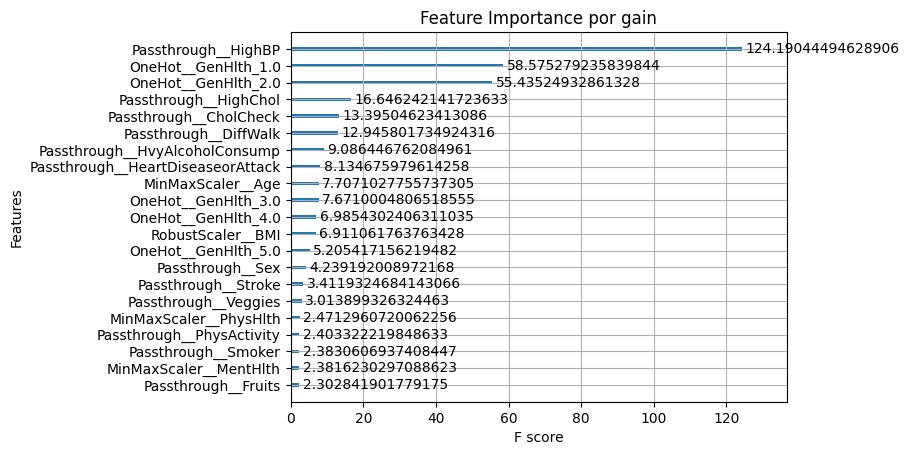

In [20]:
plot_importance(xgb_classifier, importance_type = 'gain')
plt.title("Feature Importance por gain")
plt.show()

**P2**

2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.

Los resultados obtenidos de cada método no son comparables entre si directamente, ya que miden cosas distintas y dependerá de lo que se estime conveniente para seleccionar uno por sobre otro. Así, se tiene que *weight* indica cuántas veces una *feature* fue utilizada para dividir los datos a lo largo de los árboles; *cover* corresponde a la proporción de las instancias para cuales una *feature* fue útil en las separaciones; y *gain* proporciona la mejora promedio en *precision* o la reducción del error que se obtiene cuando se utiliza cierta *feature*. La diferencia entre los resultados recae en el cómo se calculan los *scores* en cada método, ya que al considerar cosas distintas, se tendrán resultados distintos.

Dicho lo anterior, se tiene que las *features* más relevantes por método son:

* **weight**: *RobustScaler_BMI*, *MinMaxScaler_Age*, *MinMaxScaler_PhysHlth* y *MinMaxScaler_MentHlth*.

* **cover**: *Passthrough_CholCheck*, *Passthrough_HvyAlcoholConsump* y *OneHot_GenHlth_1.0*.

* **gain**: *Passthrough_HighBP*, *OneHot_GenHlth_1.0* y *OneHot_GenHlth_2.0*.


**P3**

No son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles, principalmente porque existen otros factores que influyen la estructura de este, como por ejemplo las divisones que se generan en cada nodo. En esta misma línea, se tiene que las debilidades que presentan estos métodos es el poseer un contexto limitado, ya que no se tiene una explicación contextual de cómo las características afectan las predicciones en ejemplos individuales; y que hay interacciones no capturadas, es decir, no se muestran las interacciones entre *features*, que pueden ser relevantes en los modelos de árboles.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features.
2. Visualice los resultados de este método en un gráfico.
3. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?).
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta?
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [21]:
from sklearn.inspection import permutation_importance
import numpy as np

In [22]:
permutation_results = permutation_importance(pipeline_xgb, X_test, y_test, n_repeats = 30, random_state = 555)


In [23]:
# permutation_results

In [24]:
importances = pd.DataFrame(permutation_results.importances, index=X.columns)

In [25]:
# importances

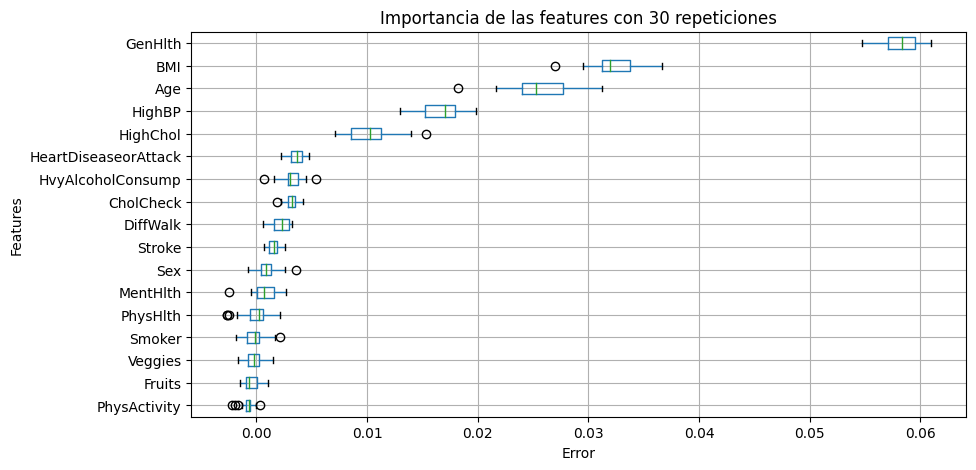

In [26]:
importances_mean = importances.mean(axis=1)
importances_sorted = importances.loc[importances_mean.sort_values(ascending=True).index]

plt.figure(figsize=(10, 5))
importances_sorted.T.boxplot(vert = False)
plt.xlabel('Error')
plt.ylabel('Features')
plt.title('Importancia de las features con 30 repeticiones')
plt.show()

**Respuestas**

**P3**

La desviación estándar indica la variabilidad de la importancia de cada *feature*, ya que no se espera que sea igual en cada iteración, dado que las reglas de evaluación de cada árbol varía. Una alta desviación estándar indica que la importancia de la *feature* varia considerablemente entre cada iteración; mientras que en el caso contrario, indica que la *feature* es consistentemente importante.

**P4**

* En este caso, se mide la importancia de las *features* observando cuánto aumenta el error del modelo cuando los valores de una *feature* permutan. Para esto, primero se entrena el modelo, luego se permutan los valores de las *feature* (una a la vez), se evalua el rendimiento del modelo y se calculan las distintas métricas.

* Las *features* que tienen un mayor impacto en la salida del modelo son *GenHlth*, *BMI*, *Age*, *HighBP* y *HighCol*. Estas *features* tienen sentido, ya que hacen referencias a factores relacionados a las Diabetes y a las enfermedades en general, como el índice de masa corporal, la edad o el colesterol.

* Si se realiza un contraste entre las *features* obtenidas con el método de permutación y las de la parte anterior, se tiene que se encuentran presentes en ambos lados, por lo que se podría deducir que este método se hace cargo de los métodos anteriores en algún grado, por lo que si sería relevante.

* Principales ventajas y desventajas:

    **Ventajas**
    
    * Evaluación del impacto en el modelo: Se mide reactemente cómo afecta la permutación de una *feature* en el rendimiento del modelo, obteniendo una visión clara de la importancia de cada una.
    
    * Independencia del modelo interno: No depende de cómo el modelo está construido internamente, por lo que es generalizable con otros tipos.
    
    * Facilita la interpretración: Porporciona una métrica que se puede interpretar fácilmente, permitiendo una comunicación de resultados más fluida.

    **Desventajas**
    
    * Costo computacional: Si se requiere evaluar muchas veces un modelo, puede ser costoso en términos de tiempo y recursos computacionales.
    
    * Sensibildiad a la variabilidad: La importancia puede ser sensible a la variabilidad en el rendimiento del modelo.
    
    * Limitación por complejidad: Puede que no capture adecuadamente la importancia de las *features* en modelos de alta complejidad.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo.
2. ¿Qué representa cada número en su resultado?
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [27]:
# !pip install shap

In [28]:
import warnings
import shap
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [29]:
explainer = shap.TreeExplainer(xgb_classifier)
shap_values = explainer(col_transformer.transform(X_test))

In [30]:
shap_values

.values =
array([[-1.6124158 ,  0.09963197, -0.06583697, ..., -0.08719549,
        -0.02229082, -0.51501006],
       [-0.44752163, -0.09184295, -0.19900341, ...,  0.27095154,
         0.00242413, -0.65206444],
       [ 0.548867  ,  0.07770074,  0.05705378, ..., -0.04872288,
        -0.01830512, -0.49785972],
       ...,
       [-0.02405399,  0.33923507,  0.6915322 , ...,  0.18268563,
        -0.02032875,  0.40234634],
       [ 0.44227713,  0.007866  , -0.17273597, ..., -0.05839192,
        -0.018509  , -0.48862717],
       [ 0.46473795,  0.04080298, -0.00526657, ..., -0.03847507,
        -0.02019309, -0.56529516]], dtype=float32)

.base_values =
array([-0.00819244, -0.00819244, -0.00819244, ..., -0.00819244,
       -0.00819244, -0.00819244], dtype=float32)

.data =
array([[0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.83333333, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.75      , 0.        , 0.1 

**Respuestas**

**P2**

Se obtienen 3 tipos de valores, *values*, que corresponde a los valores SHAP calculados para cada *feature*, que representa la contribución específica de una *feature* a la predicción; *base values*, que representa los valores bases para las predicciones del modelo; y *data*, que se refiere al conjunto de datos sobre el cual se están calculando los valores SHAP.

**P3**

Un valor SHAP positivo significa que la presencia de esta *feature*, o un aumento de esta, contribuye a una predicción más alta o más positiva del modelo para dicha observación; mientras que un valor SHAP negativo significa que la ausencia de esta *feature*, o un decrecimiento de esta, contribuye a una predicción más baja o más negativa del modelo para dicha observación.

### 5.2 Aporte local (0.4 puntos)


1. Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?

  - ¿Existe algún patrón común entre las instancias analizadas?

  - ¿Es posible generalizar estas conclusiones a todo el dataset?

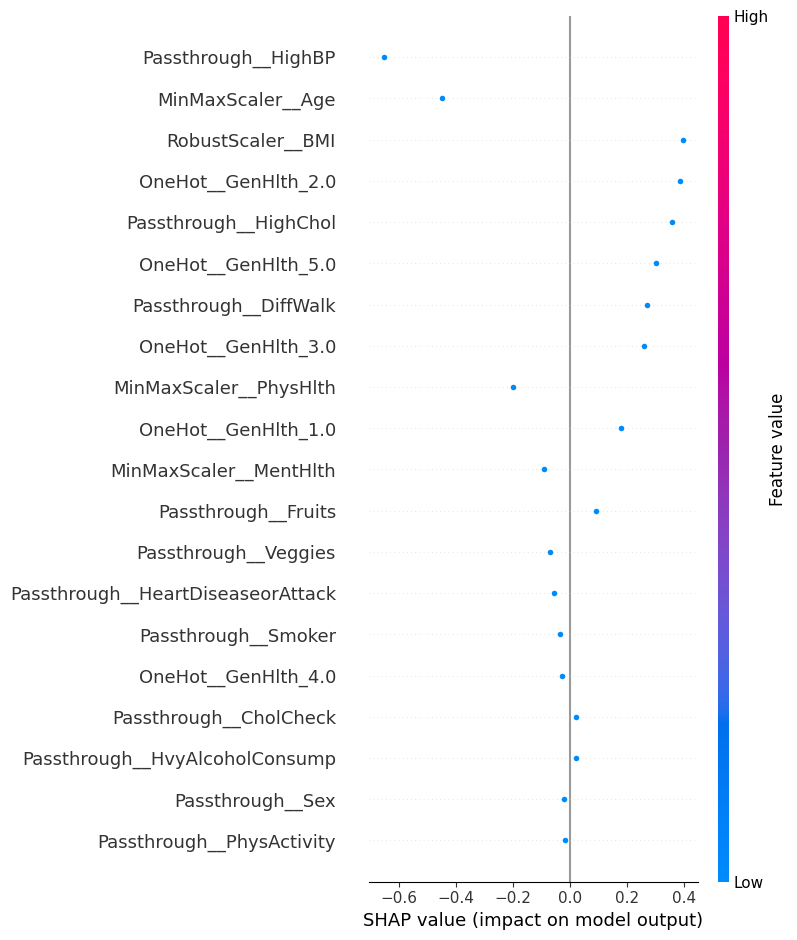

In [31]:
shap.summary_plot(shap_values[[1]], feature_names = col_transformer.transform(X_test).columns, features = col_transformer.transform(X_test)[:1])

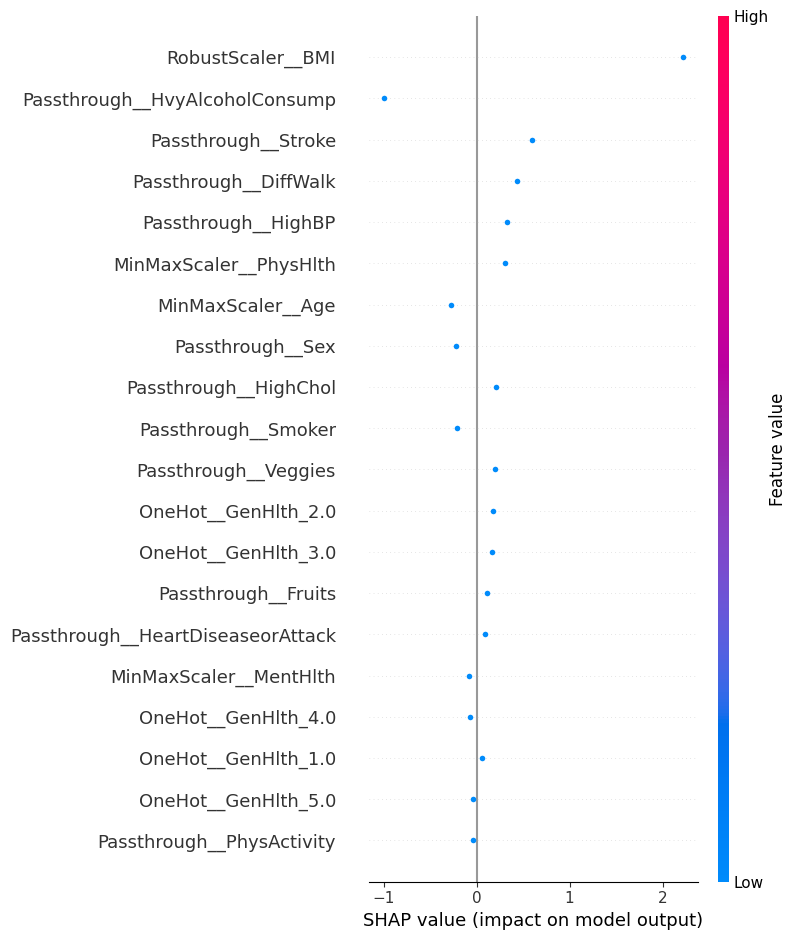

In [32]:
shap.summary_plot(shap_values[[9]], feature_names = col_transformer.transform(X_test).columns, features = col_transformer.transform(X_test)[9:10])

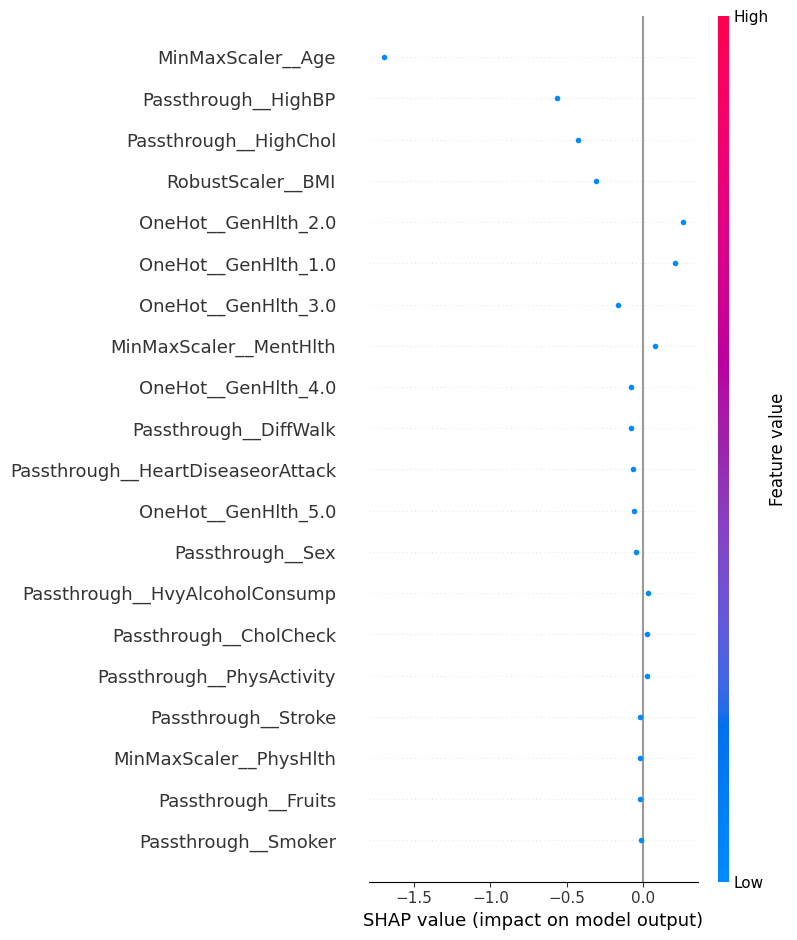

In [33]:
shap.summary_plot(shap_values[[150]], feature_names = col_transformer.transform(X_test).columns, features = col_transformer.transform(X_test)[150:151])

**Respuestas**

* A partir de los gráficos, se tiene que en las instancias 1 y 150, tanto *Age*, como *HighBP*, afectan de manera negativa. Por otro lado, de las instancias 1 y 9, se tiene que *BMI* influye de manera positiva, al igual que *HighChol*.

* No existe un patrón en común entre todas las intancias, sin embargo, entre la 1 y la 150 existen *features* que se comportan de manera similar, como pueden ser *Age*, *HighBP* o *HighChol*.

* De las instancias analizadas, no es posible generalizar estas conclusiones para todo el dataset. Esto se debe a que no todas las *features* importan de igual manera en cada paciente, por lo que al generalizar se estarían incluyendo casos que no necesariamente se comportan igual.


### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

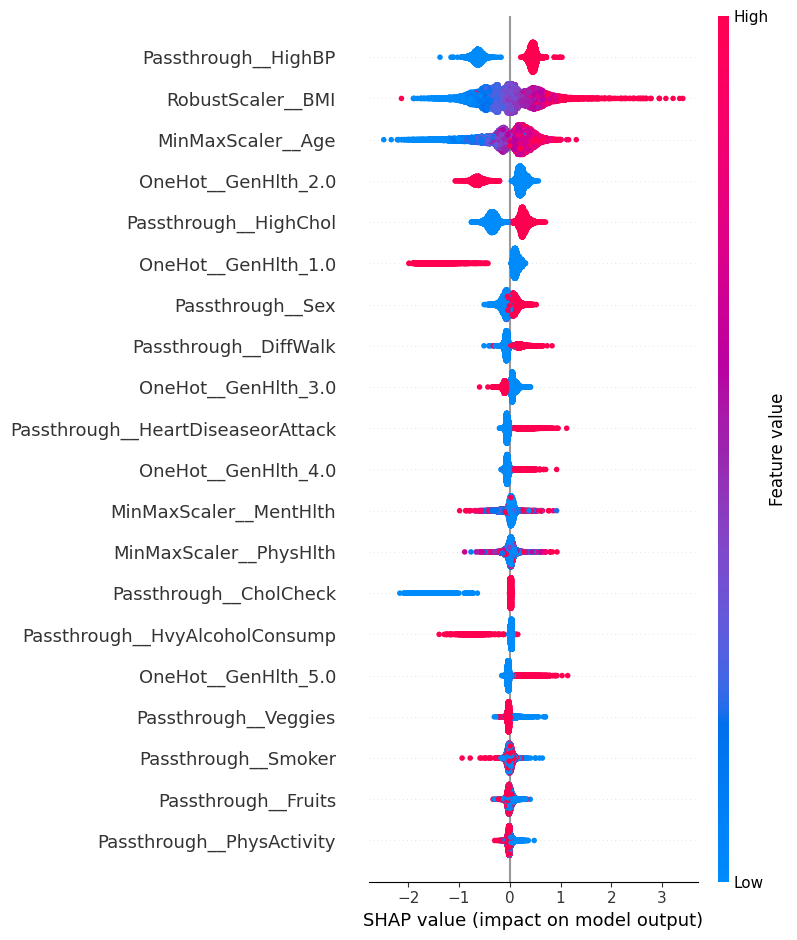

In [34]:
shap.summary_plot(shap_values, feature_names = col_transformer.transform(X_test).columns, features = col_transformer.transform(X_test))

**Respuesta**

Más que diferencias, se observa una coincidencia entre las variables más importantes por instancia, como por ejemplo *HighBP*, *BMI* y *Age*. Adicionalmente, se observa con mayor claridad como estas influyen a nivel general.

### 5.4 Scatter plot (0.4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

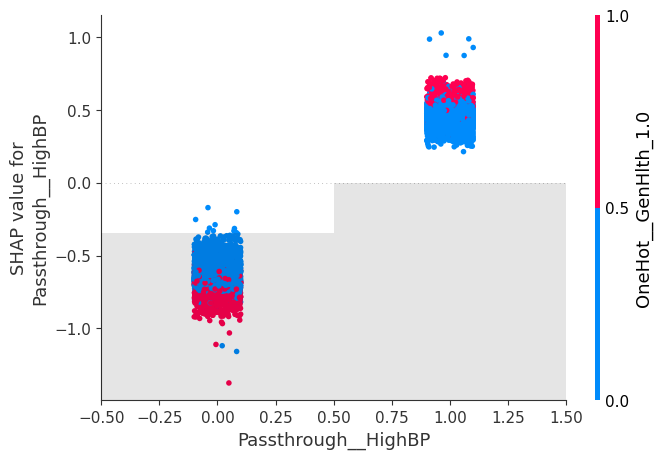

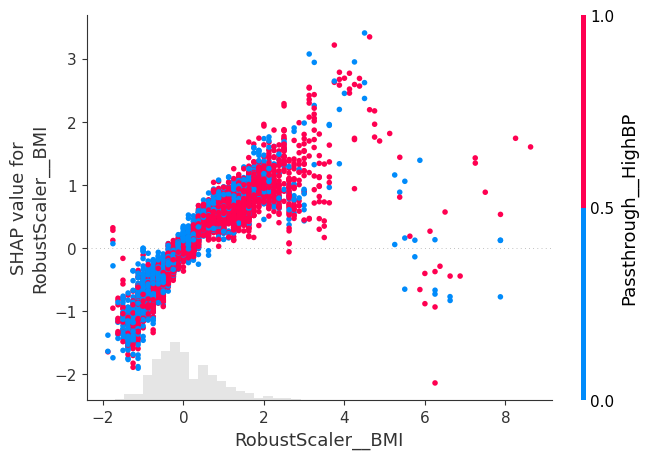

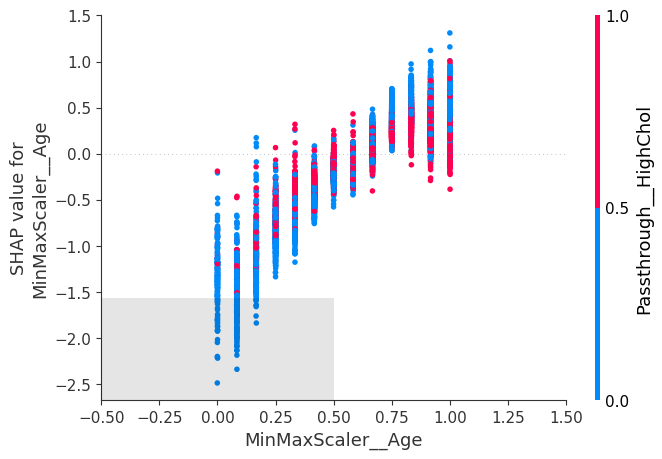

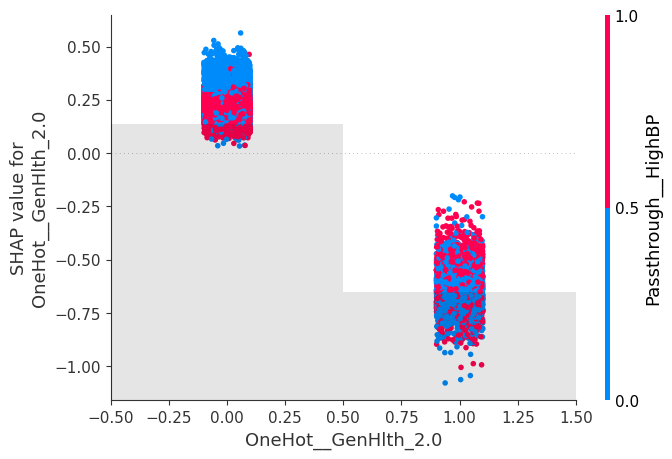

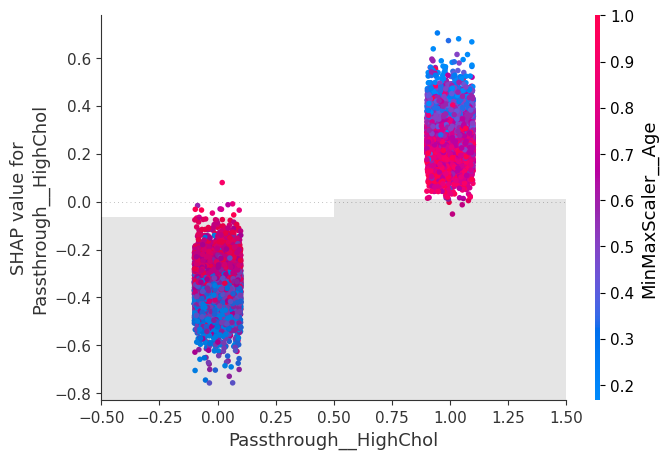

In [35]:
top_features = ['Passthrough__HighBP', 'RobustScaler__BMI', 'MinMaxScaler__Age', 'OneHot__GenHlth_2.0', 'Passthrough__HighChol']

for feature in top_features:    
    shap.plots.scatter(shap_values[:, col_transformer.transform(X_test).columns.get_loc(feature)], color = shap_values)

**Respueta**

* **Passthrough__HighBP**: Si se tienen *HighBP*, aumenta la probabilidad de tener diabetes.

* **RobustScaler__BMI**: A medida que aumenta el BMI de una persona, aumenta la probabilidad de tener diabetes.

* **MinMaxScaler__Age**: Mientras más edad, aumenta la probabilidad de tener diabetes.

* **OneHot__GenHlth_2.0**: Si la condición es *GenHlth_2.0*, se tiene un aumento en la probabilidad de tener diabetes.

* **Passthrough__HighChol**: La presencia de *HighChol* implica un aumento en la probabilidad de tener diabetes.

### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

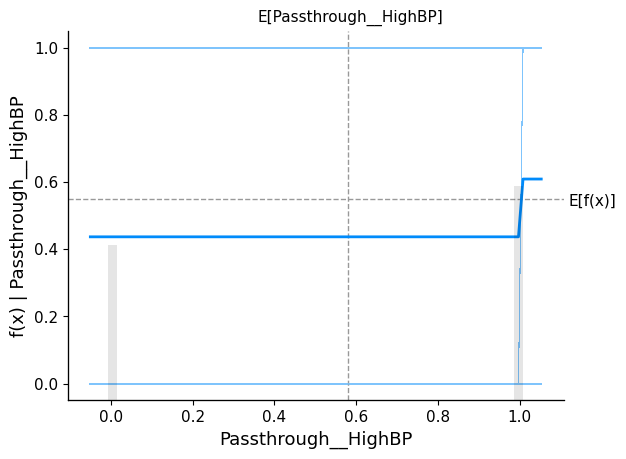

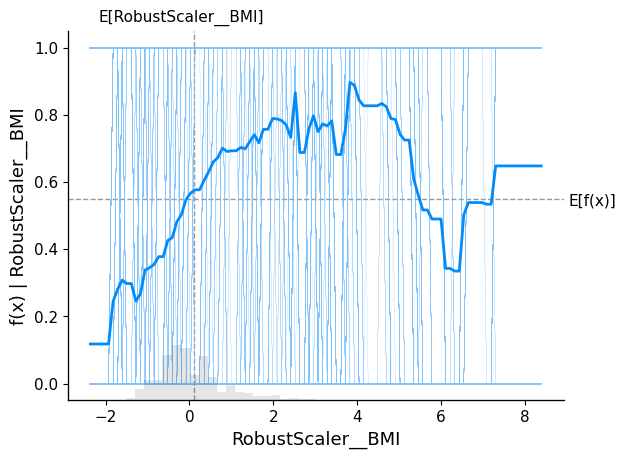

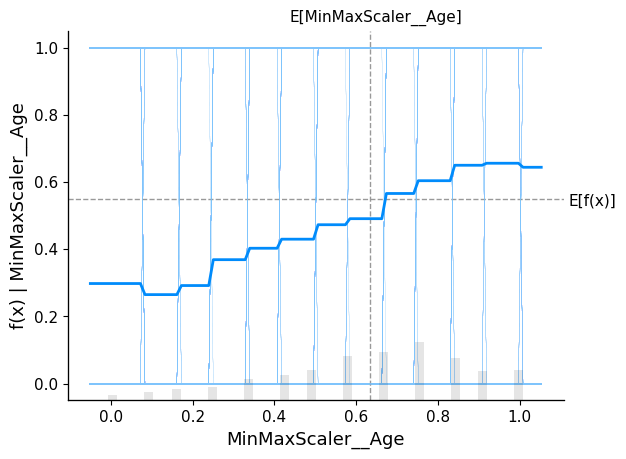

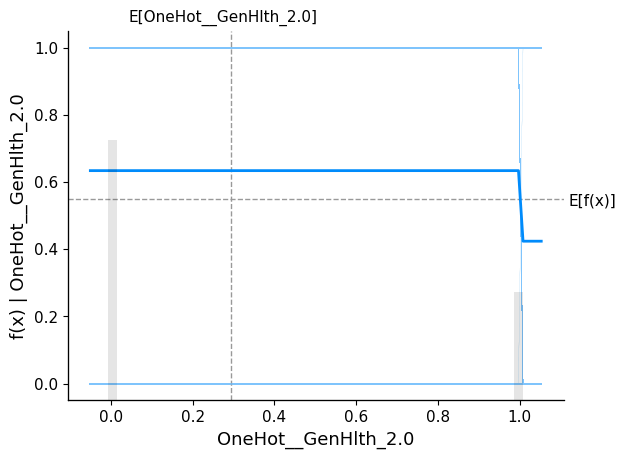

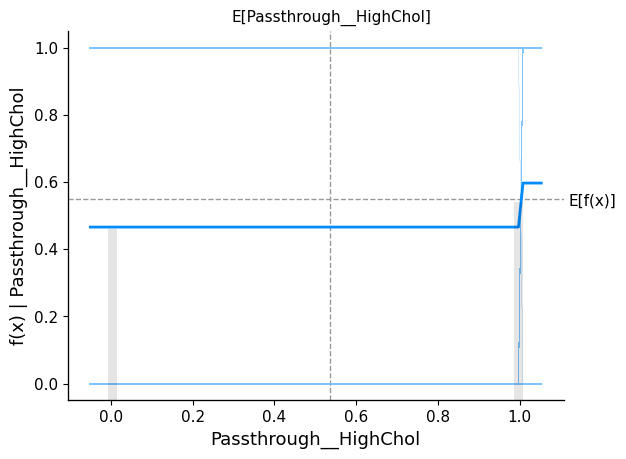

In [36]:
sample_1000 = shap.utils.sample(col_transformer.transform(X_test), 1000)

for feature in top_features:    
    shap.partial_dependence_plot(feature, xgb_classifier.predict, sample_1000, model_expected_value=True, feature_expected_value=True, ice=True)

**Respuesta**

* **Passthrough__HighBP**: Se presenta un aumento drástico, en cuanto a la función del *output*, cuando se tiene *HighBP*.

* **RobustScaler__BMI**: Se observa una variabilidad cosntante según el BMI que se poseea, teniendo como *peaks* cuando se tiene entre 2 y 4 (post escalamiento).

* **MinMaxScaler__Age**: Se presenta como aumenta la salida a partir de la edad que se tenga, teniendo una relación positiva entre ambas (mayor edad, mayor probabilidad de tener diabetes).

* **OneHot__GenHlth_2.0**: Si se tiene un estado de salud de tipo 2, disminuye la probabilidad de tener diabetes.

* **Passthrough__HighChol**: Cuando el paciente posee *HighChol*, aumenta la probabilidad de tener diabetes.

El análisis realizada corresponde a una muestra infima del total de datos, por lo que no es recomendado generalizar para todo el conjunto.

## 6. Sistema de Reglas! (1.0 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [37]:
# !pip install alibi

In [38]:
from alibi.explainers import AnchorTabular

2024-06-09 22:14:27.093725: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 22:14:27.099613: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-09 22:14:27.170546: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-09 22:14:28.663289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [40]:
# explanation = explainer.explain(col_transformer.transform(X_test[1000:1001]).values)
# explanation

In [42]:
# Inserte su código para generar sistema de reglas aquí
explainer = AnchorTabular(xgb_classifier.predict, feature_names = col_transformer.transform(X_test).columns, seed = 555)
explainer.fit(col_transformer.transform(X_test).values)

idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(col_transformer.transform(X_test[idx:idx+1]).values)
print(y_test[idx:idx+1])
print('Predicción: ', 'Diabetes' if y_test[idx:idx+1].values == 1 else 'No Diabetes')
print('Reglas: ', explanation.anchor)
print('Precisión: ', explanation.precision)
print('Cobertura: ', explanation.coverage)
print()

idx = 3001
# explicar predicción idx 3001
explanation = explainer.explain(col_transformer.transform(X_test[idx:idx+1]).values)
print(y_test[idx:idx+1])
print('Predicción: ', 'Diabetes' if y_test[idx:idx+1].values == 1 else 'No Diabetes')
print('Reglas: ', explanation.anchor)
print('Precisión: ', explanation.precision)
print('Cobertura: ', explanation.coverage)
print()


idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(col_transformer.transform(X_test[idx:idx+1]).values)
print(y_test[idx:idx+1])
print('Predicción: ', 'Diabetes' if y_test[idx:idx+1].values == 1 else 'No Diabetes')
print('Reglas: ', explanation.anchor)
print('Precisión: ', explanation.precision)
print('Cobertura: ', explanation.coverage)
print()

14468    0.0
Name: Diabetes, dtype: float64
Predicción:  No Diabetes
Reglas:  ['MinMaxScaler__Age > 0.83', 'Passthrough__HighBP > 0.00', 'OneHot__GenHlth_3.0 > 0.00', 'Passthrough__HighChol > 0.00']
Precisión:  0.9531772575250836
Cobertura:  0.0281

45499    1.0
Name: Diabetes, dtype: float64
Predicción:  Diabetes
Reglas:  ['OneHot__GenHlth_2.0 > 0.00', 'RobustScaler__BMI <= 0.00', 'Passthrough__DiffWalk <= 0.00', 'MinMaxScaler__Age <= 0.83', 'OneHot__GenHlth_4.0 <= 0.00', 'Passthrough__HeartDiseaseorAttack <= 0.00', 'Passthrough__Fruits > 0.00', 'Passthrough__Smoker <= 0.00']
Precisión:  0.9704918032786886
Cobertura:  0.0574

63894    1.0
Name: Diabetes, dtype: float64
Predicción:  Diabetes
Reglas:  ['OneHot__GenHlth_2.0 <= 0.00', 'Passthrough__HighBP > 0.00', 'MinMaxScaler__PhysHlth > 0.17', 'Passthrough__HighChol > 0.00']
Precisión:  0.9741824440619621
Cobertura:  0.1226



**Respuesta**

De lo anterior, se tiene que la cobertura de las reglas propuestas es relativamente baja, ya que abaracan a un 3%, 6% y 12% respectivamente. Sin embargo, la precisión que entregan es alta, lo que quiere decir que las reglas son específicas para dichos casos, no puedo extrapolar o generalizar estas al resto de los datos.

Enfocandose en lo que dicen estas como tal, se puede observar que algunas reglas se condicen, como en el caso de la edad, donde en 1, que dice que no es diabetes, se dice que la edad debe ser  mayor a 0.83 (escalado); mientras que en 2 se dice que debe ser menor o igual a 0.83 para que si sea diabetes; mientras que otras no, como que en 1 y 3 digan que *HighBP* debe ser mayor que 0, pero en un caso es diabetes y en el otro no.

# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

**Respuesta**

Cada método abordado en este laboratorio tiene enfoque distinto, por lo que aquel que permita entregar mejores conclusiones dependerá de lo que se busque finalmente, teniendo en consideración algunas limitaciones, como pueden ser los costos asociados a procesamiento de datos, generación de modelos o que tanto detalle se desea tener de las *features*. 

Por otro lado, el método que es más útil para el doctor también dependerá del tipo de información que se quiera obtener. Por un lado, si se quiere información general o se quieren tomar medidas a modo grueso, se recomiendan los métodos globables; mientras que si se quiere abordar de manera particular el problema, se puede utilizar un método local, específico para un individuo.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>